In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus



from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

# Reading and cleaning data

In [2]:
champs = pd.read_csv('championsdata.csv')
runnerups = pd.read_csv('runnerupsdata.csv')

In [3]:
# combine champs df and runnerups df
df = pd.concat([champs, runnerups])
df.sort_values(by=['Year', 'Game'], inplace=True)
df = df.fillna(0)

In [4]:
df.head()

,Year,Team,Game,Win,Home,MP,FG,FGA,FGP,TP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980,Lakers,1,1,1,240,48,89,0.539,0,...,0.867,12,31,43,30,5,9,17,24,109
0,1980,Sixers,1,0,0,240,40,90,0.444,0,...,0.786,14,26,40,28,12,13,14,17,102
1,1980,Lakers,2,0,1,240,48,95,0.505,0,...,0.667,15,37,52,32,12,7,26,27,104
1,1980,Sixers,2,1,0,240,43,85,0.506,0,...,0.778,5,29,34,34,14,11,20,21,107
2,1980,Lakers,3,1,0,240,44,92,0.478,0,...,0.767,22,34,56,20,5,5,20,25,111


In [5]:
# Offensive Stats
off_stats = ['Year', 'Win', 'FG', 'FGA', 'FGP', 'TP', 'TPA', 'TPP', 'FT', 'FTA', 'FTP', 'ORB', 'AST', 'PTS']
df_off = df[off_stats]

df_off_win = df_off.query('Win == 1')
df_off_lose = df_off.query('Win == 0')
df_off_lose 

,Year,Win,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,ORB,AST,PTS
0,1980,0,40,90,0.444,0,2,0.000,22,28,0.786,14,28,102
1,1980,0,48,95,0.505,0,1,0.000,8,12,0.667,15,32,104
2,1980,0,45,93,0.484,1,4,0.250,10,17,0.588,13,34,101
3,1980,0,44,93,0.473,0,0,0.000,14,19,0.737,18,23,102
4,1980,0,42,94,0.447,0,3,0.000,19,24,0.792,13,32,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2017,0,47,88,0.534,11,24,0.458,15,23,0.652,12,22,120
216,2018,0,44,99,0.444,10,37,0.270,16,22,0.727,19,18,114
217,2018,0,37,90,0.411,9,27,0.333,20,26,0.769,16,25,103
218,2018,0,40,92,0.435,9,31,0.290,13,17,0.765,15,20,102


# Correlation Matrix

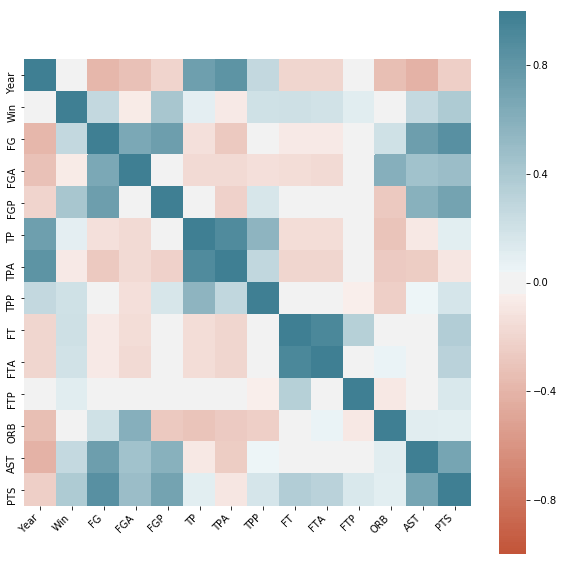

In [10]:
# Offensive Stats Correlation Matrix
plt.figure(figsize=(10,10))
corr = df_off.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [11]:
corr

,Year,Win,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,ORB,AST,PTS
Year,1.000000,0.006188,-0.379231,-0.327657,-0.203203,0.730511,0.821542,0.272380,-0.193305,-0.193424,0.003844,-0.332144,-0.417414,-0.228595
Win,0.006188,1.000000,0.271920,-0.065270,0.423321,0.086177,-0.076620,0.207504,0.213524,0.194094,0.111651,-0.030435,0.257825,0.379741
FG,-0.379231,0.271920,1.000000,0.661842,0.743237,-0.125821,-0.280371,0.025071,-0.074661,-0.076792,-0.009196,0.195706,0.747452,0.857183
FGA,-0.327657,-0.065270,0.661842,1.000000,-0.002879,-0.166104,-0.163591,-0.139403,-0.150730,-0.157041,-0.030003,0.602979,0.449052,0.494712
FGP,-0.203203,0.423321,0.743237,-0.002879,1.000000,-0.010441,-0.219670,0.162171,0.035571,0.034522,0.022280,-0.270695,0.590541,0.704898
TP,0.730511,0.086177,-0.125821,-0.166104,-0.010441,1.000000,0.886651,0.560206,-0.151324,-0.150955,-0.014693,-0.298258,-0.084002,0.106608
TPA,0.821542,-0.076620,-0.280371,-0.163591,-0.219670,0.886651,1.000000,0.286317,-0.192252,-0.192628,-0.020693,-0.265372,-0.250801,-0.090035
TPP,0.272380,0.207504,0.025071,-0.139403,0.162171,0.560206,0.286317,1.000000,-0.023531,0.001016,-0.045129,-0.231319,0.043430,0.177667
FT,-0.193305,0.213524,-0.074661,-0.150730,0.035571,-0.151324,-0.192252,-0.023531,1.000000,0.925585,0.343627,0.029517,0.026946,0.360928
FTA,-0.193424,0.194094,-0.076792,-0.157041,0.034522,-0.150955,-0.192628,0.001016,0.925585,1.000000,-0.014970,0.051994,0.031382,0.323705


# EDA

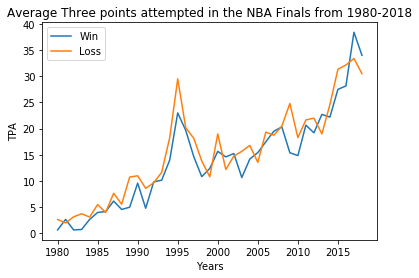

In [17]:
# Average PTS in Finals games per year
means_wins = df_off_win.groupby('Year')['TPA'].mean()
means_loss = df_off_lose.groupby('Year')['TPA'].mean()
plt.xlabel('Years')
plt.ylabel('TPA')
plt.title('Average Three points attempted in the NBA Finals from 1980-2018')
plt.plot(means_wins, label="Win")
plt.plot(means_loss, label="Loss")
plt.legend(loc='best')

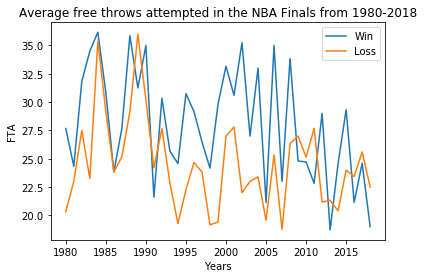

In [18]:
means_wins = df_off_win.groupby('Year')['FTA'].mean()
means_loss = df_off_lose.groupby('Year')['FTA'].mean()
plt.xlabel('Years')
plt.ylabel('FTA')
plt.title('Average free throws attempted in the NBA Finals from 1980-2018')
plt.plot(means_wins, label="Win")
plt.plot(means_loss, label="Loss")
plt.legend(loc='best')

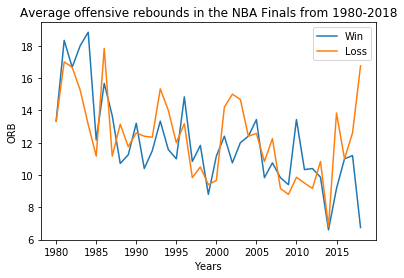

In [19]:
means_wins = df_off_win.groupby('Year')['ORB'].mean()
means_loss = df_off_lose.groupby('Year')['ORB'].mean()
plt.xlabel('Years')
plt.ylabel('ORB')
plt.title('Average offensive rebounds in the NBA Finals from 1980-2018')
plt.plot(means_wins, label="Win")
plt.plot(means_loss, label="Loss")
plt.legend(loc='best')

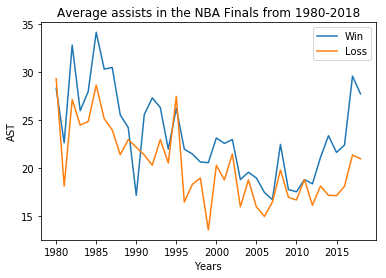

In [99]:
means_wins = df_off_win.groupby('Year')['AST'].mean()
means_loss = df_off_lose.groupby('Year')['AST'].mean()
plt.xlabel('Years')
plt.ylabel('AST')
plt.title('Average assists in the NBA Finals from 1980-2018')
plt.plot(means_wins, label="Win")
plt.plot(means_loss, label="Loss")
plt.legend(loc='best')

# Logistic Regression

In [106]:
y = df['Win']
x = df[['Home','TPP','FTP','ORB','AST', 'FGP', 'PTS', 'TPA', 'FGA']]
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_pred = logisticRegr.predict(x_test)

r_sq = logisticRegr.score(x, y)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[47 13]
 [19 53]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.75        60
           1       0.80      0.74      0.77        72

    accuracy                           0.76       132
   macro avg       0.76      0.76      0.76       132
weighted avg       0.76      0.76      0.76       132



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [102]:
df.columns

Index(['Year', 'Team', 'Game', 'Win', 'Home', 'MP', 'FG', 'FGA', 'FGP', 'TP',
       'TPA', 'TPP', 'FT', 'FTA', 'FTP', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

# KNN Clustering

In [98]:
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(x_train,y_train)

y_pred2 =knn.predict(x_test)

print(confusion_matrix(y_test, y_pred2))


print(classification_report(y_test, y_pred2))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

[[43 25]
 [17 47]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.67        68
           1       0.65      0.73      0.69        64

    accuracy                           0.68       132
   macro avg       0.68      0.68      0.68       132
weighted avg       0.69      0.68      0.68       132

Accuracy: 0.6818181818181818


The optimal number of neighbors is 19


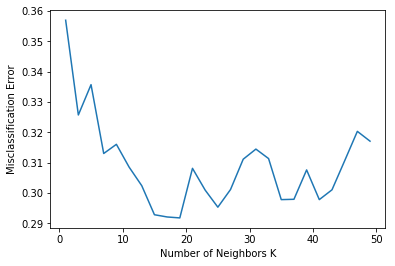

In [90]:
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# Support Vector Machine

In [96]:
svclassifier = svm.SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

y_pred1 = svclassifier.predict(x_test)

print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

[[51 17]
 [16 48]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        68
           1       0.74      0.75      0.74        64

    accuracy                           0.75       132
   macro avg       0.75      0.75      0.75       132
weighted avg       0.75      0.75      0.75       132

Accuracy: 0.75
